# Regression  in scikit_learn 

In [33]:
# import libaries 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
# other 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression



In [34]:
# import dataset 
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
# simple  linear_Regresssion 
x= df[['age']]# features or inputs are always in 2d 
y= df['fare']

In [36]:
df_linear= df[['age', 'fare']]

In [37]:
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [38]:
# fill the null values 
df_linear.age.fillna(value= df_linear['age'].mean(), inplace = True)

C:\Users\aqso\AppData\Local\Temp\ipykernel_4672\1916781619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_linear.age.fillna(value= df_linear['age'].mean(), inplace = True)
C:\Users\aqso\AppData\Local\Temp\ipykernel_4672\1916781619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value= df_linear['age'].mean(), i

In [39]:
x

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [40]:
# checking  the null values 
df_linear.isnull().sum()/len(x)*100  # checking the null values inthe inputs 

age     0.0
fare    0.0
dtype: float64

In [41]:
y.isnull().sum()/len(y)*100  # there is no null values in the output 

np.float64(0.0)

In [42]:
x.shape # input is 2d

(891, 1)

In [43]:
y.shape # output is 1d 

(891,)

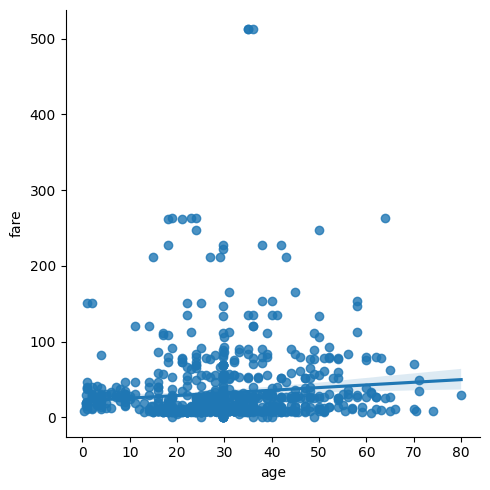

In [44]:
# plot for checking x and y 
sns.lmplot(data= df_linear, x='age', y='fare')

#### step1 
###### import libareiess
###### import model on which we study 
#### step2
###### finding null values from x, y 
######  fill the null values for comparing 
###### ploting 
###### x is always in 2d and y is 1d 
##### step 3 
##### after that removing the outliears 

<Axes: ylabel='age'>

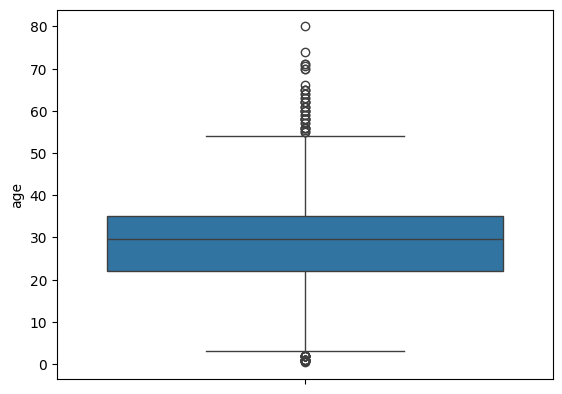

In [45]:
sns.boxplot(data=df_linear, y= 'age')

In [46]:
# removing outliers 
df_linear = df_linear[(df['age']>5)&(df['age']<55)]

<Axes: ylabel='age'>

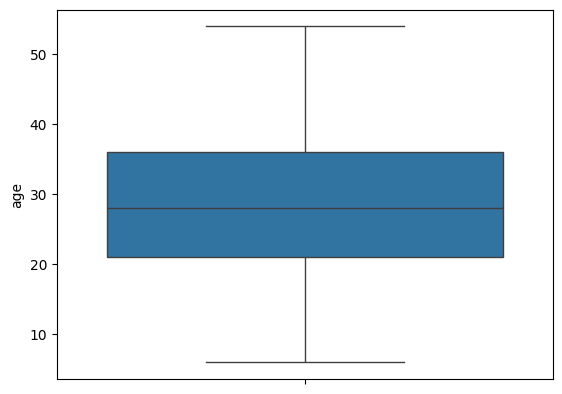

In [47]:
sns.boxplot(data=df_linear, y='age')

<Axes: ylabel='fare'>

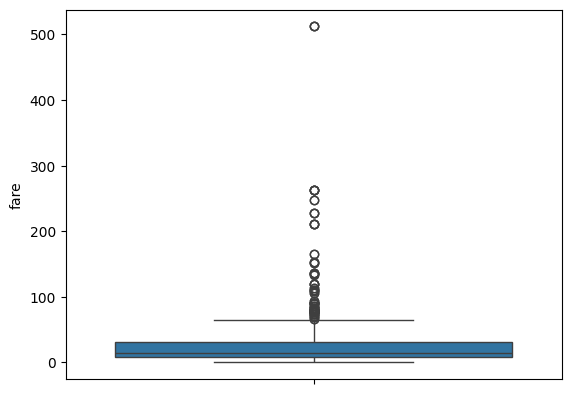

In [48]:
sns.boxplot(data=df_linear, y='fare')

In [49]:
df_linear= df_linear[(df['fare']>1)&(df['fare']<55)]

C:\Users\aqso\AppData\Local\Temp\ipykernel_4672\1162952495.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_linear= df_linear[(df['fare']>1)&(df['fare']<55)]


<Axes: ylabel='fare'>

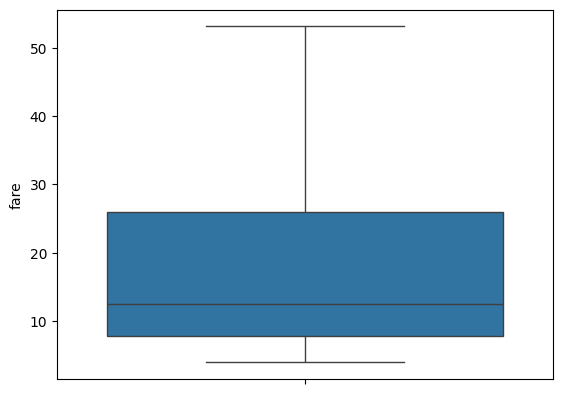

In [50]:
sns.boxplot(data=df_linear, y='fare')

In [51]:
x= df_linear[['age']]
y= df_linear['fare']

# calling the model 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# calling the model
model = LinearRegression()
# train the model 
model.fit(x,y)
# predict the  value 
model.predict([[24]])

c:\Users\aqso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.97210235])

In [53]:
# now evaluate the model with metrics 
# valuation means checking how well your machine learning model is performing.
# r2 , mean square error , mean absolute error (MAE), root mean square error (RMSE)
x_tarin , x_test, y_train, y_test= train_test_split(x,y, train_size=0.8)



In [54]:
x_test.shape

(103, 1)

In [55]:
x_tarin.shape

(410, 1)

In [56]:
x.shape

(513, 1)

In [57]:
y_test.shape

(103,)

In [58]:
y_train.shape

(410,)

In [59]:
# now creating the new nodel

# model
model= LinearRegression()
# model fit 
model.fit(x_tarin,y_train)
# model predict
prediction = model.predict(x_test)
 

<Axes: xlabel='fare'>

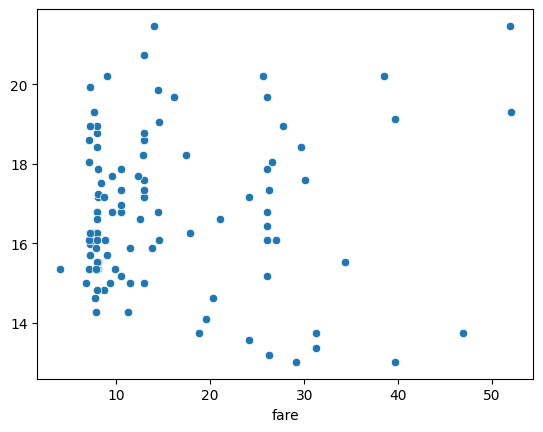

In [60]:
# now compare the model 
sns.scatterplot(x= y_test ,y= prediction)

In [61]:
model.score(x_test, y_test)

-0.023324850507034034

In [67]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
MAE= mean_absolute_error(y_true=y_test, y_pred=prediction)
MSE= mean_squared_error(y_true=y_test, y_pred=prediction)
R2= r2_score(y_true=y_test, y_pred=prediction)
print('MAE',  MAE)
print('MSE', MSE)
print("r2", R2)

MAE 8.93979619596607
MSE 112.63768548040035
r2 -0.023324850507034034
